In [9]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import hvplot.pandas
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import numpy as np


In [10]:
def create_dataframe_from_json(url):
    # Read JSON data
    response = requests.get(url)
    json_data = response.json()

    # Create a dictionary to store the data
    data_dict = {}

    # Loop through the "data" list in the JSON
    for item in json_data['data']:
        title_en = item['title_en']
        values = item['values']
        
        # Extract values.key and values.value pairs and add to the dictionary
        for entry in values:
            year = entry['key']
            value = entry['value']
            
            if title_en not in data_dict:
                data_dict[title_en] = {}
            
            data_dict[title_en][year] = value

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data_dict)
    
    return df

In [11]:
url = "http://stat.kg/ru/opendata/category/4925/json"
women_employment = create_dataframe_from_json(url)
# Reverse the order of rows
women_employment_reversed = women_employment.iloc[::-1]
women_employment_reversed

,Employment rate - female Kyrgyz Republic,Batken oblast,Djalal-Abad oblast,Issyk-Kul oblast,Naryn oblast,Osh oblast,Talas oblast,Chui oblast,Bishkek city,Osh city
2016,44.1,41.3,38.5,35.4,26.4,53.6,63.2,37.8,53.9,28.7
2017,41.8,39.4,33.6,31.7,29.0,46.8,56.0,38.9,55.6,29.7
2018,41.9,35.9,30.1,34.2,27.2,49.7,53.9,39.7,56.9,31.2
2019,42.7,32.5,32.9,34.1,28.4,55.1,50.5,39.1,54.9,31.6
2020,43.0,29.2,33.5,35.4,27.1,57.4,54.0,37.9,54.6,30.5


In [12]:
formatted_women_employment = women_employment.applymap(lambda x: f'{int(x):,}%')
formatted_women_employment

,Employment rate - female Kyrgyz Republic,Batken oblast,Djalal-Abad oblast,Issyk-Kul oblast,Naryn oblast,Osh oblast,Talas oblast,Chui oblast,Bishkek city,Osh city
2020,43%,29%,33%,35%,27%,57%,54%,37%,54%,30%
2019,42%,32%,32%,34%,28%,55%,50%,39%,54%,31%
2018,41%,35%,30%,34%,27%,49%,53%,39%,56%,31%
2017,41%,39%,33%,31%,29%,46%,56%,38%,55%,29%
2016,44%,41%,38%,35%,26%,53%,63%,37%,53%,28%


In [13]:
url = "http://stat.kg/ru/opendata/category/4924/json"
men_employment = create_dataframe_from_json(url)
# Reverse the order of rows
men_employment_reversed = men_employment.iloc[::-1]
men_employment_reversed


,Employment rate - male Kyrgyz Republic,Batken oblast,Djalal-Abad oblast,Issyk-Kul oblast,Naryn oblast,Osh oblast,Talas oblast,Chui oblast,Bishkek city,Osh city
2016,70.7,71.6,66.1,67.1,64.7,78.4,81.2,63.7,72.9,72.8
2017,70.8,70.8,63.5,65.4,64.3,79.9,78.6,66.6,73.2,74.2
2018,71.1,69.4,60.9,65.1,67.6,83.3,76.7,69.2,71.6,74.8
2019,71.9,69.8,62.6,63.8,66.9,85.3,74.9,68.8,73.4,75.0
2020,70.9,68.2,62.0,62.6,67.5,83.9,74.5,67.3,72.5,75.2


In [14]:
formatted_men_employment = men_employment.applymap(lambda x: f'{int(x):,}%')
formatted_men_employment

,Employment rate - male Kyrgyz Republic,Batken oblast,Djalal-Abad oblast,Issyk-Kul oblast,Naryn oblast,Osh oblast,Talas oblast,Chui oblast,Bishkek city,Osh city
2020,70%,68%,62%,62%,67%,83%,74%,67%,72%,75%
2019,71%,69%,62%,63%,66%,85%,74%,68%,73%,75%
2018,71%,69%,60%,65%,67%,83%,76%,69%,71%,74%
2017,70%,70%,63%,65%,64%,79%,78%,66%,73%,74%
2016,70%,71%,66%,67%,64%,78%,81%,63%,72%,72%


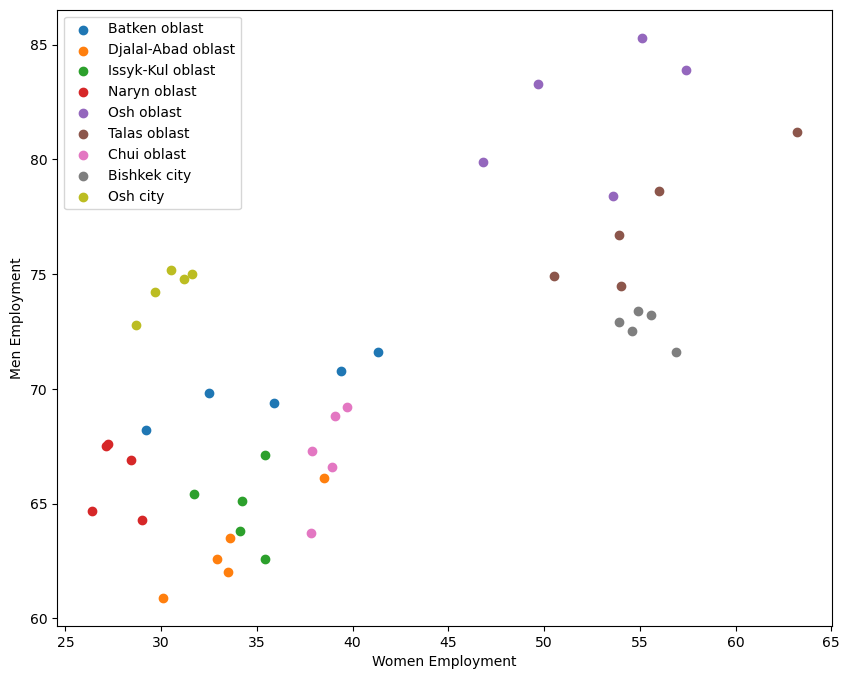

In [19]:
# Define regions
regions = ['Batken oblast', 'Djalal-Abad oblast', 'Issyk-Kul oblast', 'Naryn oblast', 'Osh oblast', 'Talas oblast', 'Chui oblast', 'Bishkek city', 'Osh city']

# Plotting
plt.figure(figsize=(10, 8))

for region in regions:
    plt.scatter(women_employment_reversed[region],men_employment_reversed[region], label=region)

plt.xlabel("Women Employment")
plt.ylabel("Men Employment")
plt.legend()
plt.show()

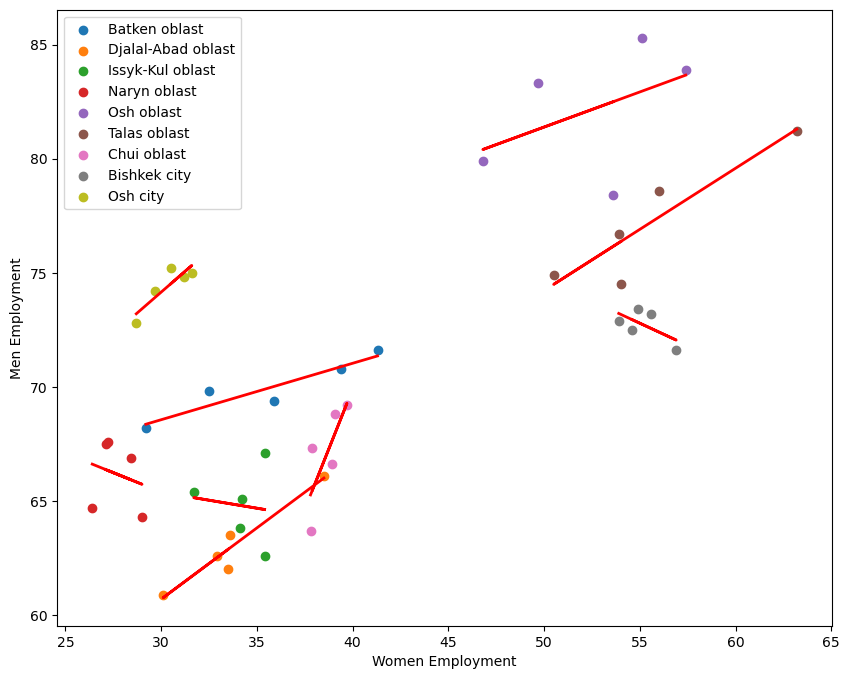

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define regions
regions = ['Batken oblast', 'Djalal-Abad oblast', 'Issyk-Kul oblast', 'Naryn oblast', 'Osh oblast', 'Talas oblast', 'Chui oblast', 'Bishkek city', 'Osh city']

# Create a figure
plt.figure(figsize=(10, 8))

for region in regions:
    x = women_employment_reversed[region].values.reshape(-1, 1)
    y = men_employment_reversed[region].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    # Plot scatter points and regression line
    plt.scatter(x, y, label=region)
    plt.plot(x, y_pred, color='red', linewidth=2)
    
plt.xlabel("Women Employment")
plt.ylabel("Men Employment")
plt.legend()
plt.show()


In [70]:
# Convert percentage strings to numeric values
women_emp_general = formatted_women_employment.stack().str.rstrip('%').astype(float)
men_emp_general = formatted_men_employment.stack().str.rstrip('%').astype(float)

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(women_emp_general, men_emp_general)[0]
print(f"The correlation coefficient between women and men is {round(correlation_coefficient, 2)}")

The correlation coefficient between women and men is 0.68


The correlation coefficient between women and men employment being 0.68 indicates a moderate positive linear relationship between women's employment rates and men's employment rates. Here's how to interpret this value:

1. **Correlation Strength:** A correlation coefficient of 0.68 is relatively close to 1, which indicates a strong positive linear relationship between the two variables. This means that as women's employment rates increase, men's employment rates also tend to increase, and vice versa.

2. **Direction of Relationship:** The positive sign of the correlation coefficient (0.68) indicates that when women's employment rates increase, men's employment rates also tend to increase. This suggests that there is a general trend for higher employment rates in both genders in the specified regions.

3. **Moderate Strength:** The value of 0.68 suggests that the relationship is moderate in strength. While it's a strong enough correlation to indicate a significant relationship between the variables, there might still be some variations or outliers that affect the correlation.

4. **Linear Relationship:** The correlation coefficient measures the strength of a linear relationship between two variables. A positive value like 0.68 means that as one variable increases, the other tends to increase in a relatively linear fashion.

5. **Limitations:** Correlation does not imply causation. Even though there's a correlation between women's and men's employment rates, it doesn't necessarily mean that changes in women's employment are causing changes in men's employment. Other factors and influences might be contributing to the observed correlation.

Overall, a correlation coefficient of 0.68 suggests a notable and positive connection between women's and men's employment rates in the specified regions, indicating that they tend to move in the same direction. However, to understand the relationship more deeply, further analysis and consideration of other relevant factors might be necessary.